In [8]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("heart.csv")

data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [9]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
data.shape, data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


((1025, 14), None)

In [11]:
data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

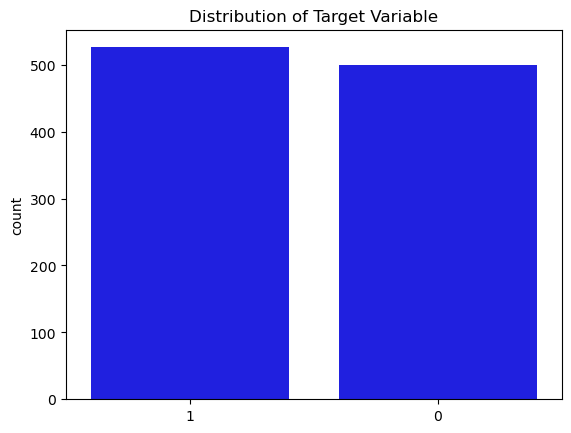

In [14]:
# More patient values w/ heart disease than there are without. 
# Visualizing values. 

x = ['1', '0']
y = data['target'].value_counts()

sns.barplot(x=x, y=y, color='blue')
plt.title('Distribution of Target Variable')
plt.show()

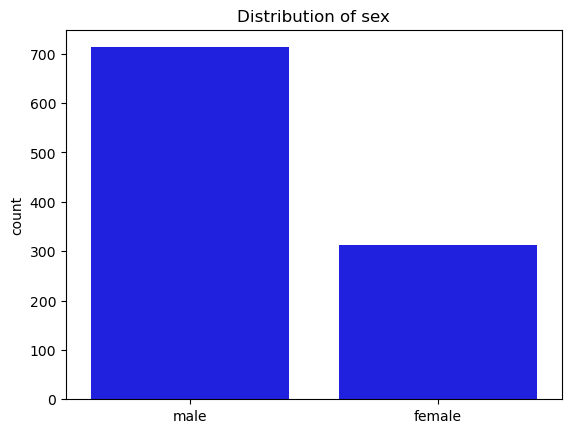

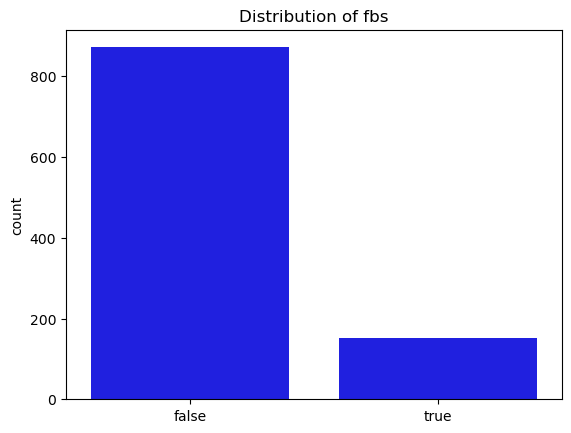

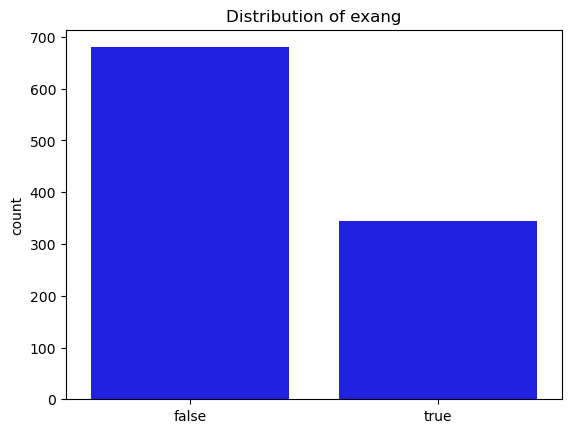

In [15]:
def showBinaryFeatureValues(feature1, feature2, feature):
    x = [feature1, feature2]
    y = data[feature].value_counts()
    
    sns.barplot(x=x, y=y, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.show()
    
showBinaryFeatureValues('male', 'female', 'sex') 
showBinaryFeatureValues('false', 'true', 'fbs')
showBinaryFeatureValues('false', 'true', 'exang')

In [58]:
# Data Preprocessing
# All of the values are already numerical so there is no need for any encoding. 

X = data.drop(['target'], axis=1)
Y = data['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# RandomForest Classification
rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, 
                             max_leaf_nodes=None, min_samples_leaf=1, max_samples=None, max_features=None)

rfc.fit(x_train, y_train)

predictions = rfc.predict(x_test)

In [62]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.975609756097561


In [63]:
# To make the search for the optimal # of trees, we can iterate through a list of range of values and return the max accuracy and # of trees. 

def ListComp():
    return [x for x in range(1, 100)]

n_estimators = ListComp()

accuracies = [] 

for i in n_estimators:                                         
    rfc = RandomForestClassifier(n_estimators=i, max_depth=None, min_samples_split=2, max_leaf_nodes=None, min_samples_leaf=1, max_samples=None, max_features=None)
    rfc.fit(x_train, y_train)
    predictions = rfc.predict(x_test)
    accuracies.append(metrics.accuracy_score(y_test, predictions))
    
#shows the maximum accuracy
max_acc = max(accuracies)
print(max_acc)

# Using sklearn's classification report to see the precision, recall, and f1 score for our model. 
classification_report(y_test, predictions)

1.0


'              precision    recall  f1-score   support\n\n           0       1.00      0.97      0.98        89\n           1       0.97      1.00      0.99       116\n\n    accuracy                           0.99       205\n   macro avg       0.99      0.98      0.99       205\nweighted avg       0.99      0.99      0.99       205\n'